In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
open_data_df = pd.read_csv('subsample.csv')
open_data_df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,52067,32379764,01/09/2016 04:17:37 PM,01/13/2016 06:15:47 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815738,-73.940730,"(40.81573796742099, -73.94072964712291)"
1,253002,33400414,05/21/2016 12:43:01 AM,05/21/2016 03:28:52 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679630,-74.009287,"(40.6796297972724, -74.00928738265931)"
2,128,32309437,01/01/2016 12:38:28 AM,01/01/2016 12:50:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.723494,-73.988253,"(40.72349367369547, -73.98825325266078)"
3,358333,32813209,03/02/2016 10:52:00 AM,03/02/2016 10:52:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11422.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.658688,-73.729434,"(40.65868770480924, -73.72943448563208)"
4,107244,33191181,04/22/2016 12:31:00 PM,04/22/2016 07:10:00 PM,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,11229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.602889,-73.951027,"(40.60288926307405, -73.95102719178794)"


In [3]:
pop_df = pd.read_csv('ACS_16_Pop.csv', header=[1])
income_df = pd.read_csv('ACS_16_Income.csv', header=[1])
rent_df = pd.read_csv('ACS_16_Rent.csv', header=[1])

In [4]:
pop_df.head()

,Id,Id2,Geography,Estimate; Total,Margin of Error; Total
0,8600000US06390,6390,ZCTA5 06390,303,151
1,8600000US07421,7421,ZCTA5 07421,7281,512
2,8600000US10001,10001,ZCTA5 10001,23332,1740
3,8600000US10002,10002,ZCTA5 10002,78096,2456
4,8600000US10003,10003,ZCTA5 10003,56767,1934


In [5]:
pop_df = pop_df.drop(columns=['Id', 'Geography', 'Margin of Error; Total'])
pop_df = pop_df.drop(pop_df.index[0])
pop_df = pop_df.drop(pop_df.index[0])
pop_df = pop_df.rename(index=str, columns={'Id2': 'Zip Code', 'Estimate; Total': 'Population Estimate'})

In [6]:
pop_df.head()

,Zip Code,Population Estimate
2,10001,23332
3,10002,78096
4,10003,56767
5,10004,3044
6,10005,8710


In [7]:
income_df.head()

,Id,Id2,Geography,Total; Estimate; Households,Total; Margin of Error; Households,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Households,Total; Estimate; Households - One race-- - White,Total; Margin of Error; Households - One race-- - White,Median income (dollars); Estimate; Households - One race-- - White,...,Median income (dollars); Estimate; PERCENT ALLOCATED - Household income in the past 12 months,Median income (dollars); Margin of Error; PERCENT ALLOCATED - Household income in the past 12 months,Total; Estimate; PERCENT ALLOCATED - Family income in the past 12 months,Total; Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months,Median income (dollars); Estimate; PERCENT ALLOCATED - Family income in the past 12 months,Median income (dollars); Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months,Total; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Total; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Median income (dollars); Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Median income (dollars); Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months
0,8600000US06390,6390,ZCTA5 06390,118,54,152652,17233,100,22.2,152652,...,(X),(X),63,(X),(X),(X),4.4,(X),(X),(X)
1,8600000US07421,7421,ZCTA5 07421,2575,180,94375,11261,95.5,2.5,96591,...,(X),(X),43.4,(X),(X),(X),31.7,(X),(X),(X)
2,8600000US10001,10001,ZCTA5 10001,11967,548,85168,11872,69.3,3.4,101797,...,(X),(X),31.5,(X),(X),(X),18.4,(X),(X),(X)
3,8600000US10002,10002,ZCTA5 10002,33327,636,35594,2970,37.5,1.8,67933,...,(X),(X),36.1,(X),(X),(X),25.3,(X),(X),(X)
4,8600000US10003,10003,ZCTA5 10003,27258,681,100791,4905,81.9,1.9,102454,...,(X),(X),30.3,(X),(X),(X),21.9,(X),(X),(X)


In [8]:
income_df = income_df.drop(income_df.columns[0], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[2:120], axis=1)
income_df = income_df.drop(income_df.index[0])
income_df = income_df.drop(income_df.index[0])
income_df = income_df.rename(index=str, columns={'Id2': 'Zip Code', 'Median income (dollars); Estimate; Households': 'Median Estimate'})

In [9]:
income_df.head()

,Zip Code,Median Estimate
2,10001,85168
3,10002,35594
4,10003,100791
5,10004,123056
6,10005,130116


In [10]:
rent_df.head()

,Id,Id2,Geography,Estimate; Median gross rent,Margin of Error; Median gross rent
0,8600000US06390,6390,ZCTA5 06390,1388,33
1,8600000US07421,7421,ZCTA5 07421,1772,191
2,8600000US10001,10001,ZCTA5 10001,2114,188
3,8600000US10002,10002,ZCTA5 10002,919,35
4,8600000US10003,10003,ZCTA5 10003,2117,82


In [11]:
rent_df = rent_df.drop(columns=['Id', 'Geography', 'Margin of Error; Median gross rent'])
rent_df = rent_df.drop(rent_df.index[0])
rent_df = rent_df.drop(rent_df.index[0])
rent_df = rent_df.rename(index=str, columns={'Id2': 'Zip Code', 'Estimate; Median gross rent': 'Gross Rent Estimate'})

In [12]:
rent_df.head()

,Zip Code,Gross Rent Estimate
2,10001,2114
3,10002,919
4,10003,2117
5,10004,2911
6,10005,3005


In [13]:
rentandincome = pd.merge(rent_df, income_df, on='Zip Code')
rentandincome.head()

,Zip Code,Gross Rent Estimate,Median Estimate
0,10001,2114,85168
1,10002,919,35594
2,10003,2117,100791
3,10004,2911,123056
4,10005,3005,130116


In [14]:
data = pd.merge(rentandincome, pop_df, on='Zip Code')
data.head()

,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,10001,2114,85168,23332
1,10002,919,35594,78096
2,10003,2117,100791,56767
3,10004,2911,123056,3044
4,10005,3005,130116,8710


In [15]:
open_data_df = open_data_df[open_data_df['Incident Zip'].notnull()]

In [16]:
open_data_df['Zip Code'] = open_data_df['Incident Zip'].astype(np.int64)

In [17]:
open_data_df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Zip Code
0,52067,32379764,01/09/2016 04:17:37 PM,01/13/2016 06:15:47 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.815738,-73.940730,"(40.81573796742099, -73.94072964712291)",10030
1,253002,33400414,05/21/2016 12:43:01 AM,05/21/2016 03:28:52 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679630,-74.009287,"(40.6796297972724, -74.00928738265931)",11231
2,128,32309437,01/01/2016 12:38:28 AM,01/01/2016 12:50:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.723494,-73.988253,"(40.72349367369547, -73.98825325266078)",10009
3,358333,32813209,03/02/2016 10:52:00 AM,03/02/2016 10:52:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11422.0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.658688,-73.729434,"(40.65868770480924, -73.72943448563208)",11422
4,107244,33191181,04/22/2016 12:31:00 PM,04/22/2016 07:10:00 PM,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,11229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.602889,-73.951027,"(40.60288926307405, -73.95102719178794)",11229


In [18]:
open_data_df.columns#, 'Closed Date', 'Latitude', 'Longitude', 'Location'])


Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Zip Code'],
      dtype='object')

In [19]:
open_data_df.drop(['Unnamed: 0'], axis = 1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Zip Code
0,32379764,01/09/2016 04:17:37 PM,01/13/2016 06:15:47 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10030.0,118 WEST 137 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.815738,-73.940730,"(40.81573796742099, -73.94072964712291)",10030
1,33400414,05/21/2016 12:43:01 AM,05/21/2016 03:28:52 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11231.0,89 VERONA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679630,-74.009287,"(40.6796297972724, -74.00928738265931)",11231
2,32309437,01/01/2016 12:38:28 AM,01/01/2016 12:50:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10009.0,16 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.723494,-73.988253,"(40.72349367369547, -73.98825325266078)",10009
3,32813209,03/02/2016 10:52:00 AM,03/02/2016 10:52:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11422.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.658688,-73.729434,"(40.65868770480924, -73.72943448563208)",11422
4,33191181,04/22/2016 12:31:00 PM,04/22/2016 07:10:00 PM,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,11229.0,2042 EAST 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.602889,-73.951027,"(40.60288926307405, -73.95102719178794)",11229
5,32442963,01/18/2016 11:08:25 PM,01/19/2016 01:27:50 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10304.0,30 MAXIE COURT,...,NaN,NaN,NaN,NaN,NaN,NaN,40.621700,-74.085917,"(40.62169962366208, -74.08591659326042)",10304
6,34769996,11/13/2016 03:50:50 AM,11/13/2016 05:16:52 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11207.0,340 WILLIAMS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.667670,-73.898657,"(40.66767046479791, -73.89865733007855)",11207
7,34163180,08/24/2016 02:37:17 PM,08/26/2016 02:17:34 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11368.0,98-25 HORACE HARDING EXPRESSWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,40.735678,-73.859843,"(40.73567803993014, -73.85984312437)",11368
8,32529895,01/26/2016 06:15:00 AM,01/27/2016 12:00:00 PM,DSNY,BCC - Brooklyn North,Other Enforcement,E10 Street Obstruction,Sidewalk,11226.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.639692,-73.953205,"(40.6396923391357, -73.95320533582682)",11226
9,33336131,05/12/2016 11:48:00 AM,05/12/2016 11:48:00 AM,DOT,Department of Transportation,Street Light Condition,Lamppost Base Door/Cover Open,NaN,11206.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699999,-73.957224,"(40.69999939459152, -73.95722387138059)",11206


In [20]:
open_data_df = open_data_df.drop(['Unnamed: 0','Unique Key', 'Closed Date',
       'Agency Name', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'], axis = 1)

In [21]:
open_data_df.head()

,Created Date,Agency,Complaint Type,Zip Code
0,01/09/2016 04:17:37 PM,HPD,HEAT/HOT WATER,10030
1,05/21/2016 12:43:01 AM,NYPD,Noise - Residential,11231
2,01/01/2016 12:38:28 AM,NYPD,Noise - Commercial,10009
3,03/02/2016 10:52:00 AM,DOT,Street Light Condition,11422
4,04/22/2016 12:31:00 PM,DEP,Water System,11229


In [22]:
df = pd.merge(open_data_df, data, left_on='Zip Code', right_on='Zip Code')

In [23]:
df.tail()

,Created Date,Agency,Complaint Type,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
18472,10/16/2016 03:32:33 PM,NYPD,Vending,10020,-,-,0
18473,09/18/2016 06:38:41 PM,NYPD,Noise - Residential,10177,-,-,0
18474,06/30/2016 03:35:00 PM,DEP,Water System,11040,1486,111035,41381
18475,11/02/2016 08:48:03 PM,DOT,Street Condition,10278,-,-,0
18476,05/10/2016 08:30:35 AM,DOT,Street Condition,10803,1853,150688,12560


In [24]:
df = df[df['Gross Rent Estimate'] != '-']
df = df[df['Gross Rent Estimate'] != 0]
df = df[df['Median Estimate'] != '-']
df = df[df['Median Estimate'] != 0]
df = df[df['Population Estimate'] != 0]

In [25]:
df['Created Date'] = df['Created Date'].apply(lambda x: str(x).split(' ')[0])
df['Created Date'] = df['Created Date'].apply(lambda x: str(x).split('/')[0])
df['Created Date'] = df['Created Date'].apply(lambda x: int(x))


In [26]:
df['Median Estimate'] = df['Median Estimate'].apply(lambda x: str(x).split('+')[0])
df['Gross Rent Estimate'] = df['Gross Rent Estimate'].apply(lambda x: str(x).split('+')[0])

In [27]:
df['Gross Rent Estimate'] = df['Gross Rent Estimate'].apply(lambda x: int(x))

In [28]:
df['Median Estimate'] = df['Median Estimate'].apply(lambda x: x.strip(','))

In [29]:
df['Median Estimate'] = df['Median Estimate'].replace('250,000', '250000')

In [30]:
df['Median Estimate'] = df['Median Estimate'].apply(lambda x: int(x))
df['Median Estimate'].unique()

array([ 33720,  84223,  60788,  85436,  55187,  53843,  35849,  45980,
        45031,  31549,  73068,  22914,  62014,  57310,  26893,  51864,
        56568,  60821,  47135, 118310,  59520,  51675,  34964,  70408,
       110142,  38451,  29934,  46971,  48315,  25771,  65181,  26419,
        53829,  36573,  34988,  80025,  64544,  25967,  62841,  35594,
        43361,  46351,  25868,  55332,  43660,  66978,  28495,  75362,
        55700,  45643,  94477,  37640,  46349,  40576,  45811,  46340,
        41190,  57124, 114134,  77037,  75757,  56442,  30339, 115080,
        24086,  52239,  63079,  60526,  57454,  52119,  52277,  85168,
        63641, 108178,  59190,  45578,  44647,  24805, 115681,  60885,
        36686,  45677,  32500,  48597, 104167,  83812,  52082,  77278,
        43344,  70490,  52792,  42754,  73391, 105479,  42333,  57155,
        66070,  72982,  55268,  45820,  41848,  61631,  88567,  77761,
        78745,  40054, 102306,  39463,  93248,  37556,  23962,  74063,
      

In [31]:
df.head()

,Created Date,Agency,Complaint Type,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,1,HPD,HEAT/HOT WATER,10030,917,33720,30358
1,7,NYPD,Noise - Residential,10030,917,33720,30358
2,7,DSNY,Sweeping/Inadequate,10030,917,33720,30358
3,1,HPD,PAINT/PLASTER,10030,917,33720,30358
4,10,HPD,DOOR/WINDOW,10030,917,33720,30358


In [32]:
conditions = [(df['Created Date'] == 1), (df['Created Date'] == 2), (df['Created Date'] == 3), (df['Created Date'] == 4), (df['Created Date'] == 5), (df['Created Date'] == 6), (df['Created Date'] == 7), (df['Created Date'] == 8), (df['Created Date'] == 9), (df['Created Date'] == 10), (df['Created Date'] == 11), (df['Created Date'] == 12)]
choices = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
df['Created Date'] = np.select(conditions, choices, default='black')

In [33]:
len(df[df['Zip Code'] == 10030])

97

In [34]:
df_all = df
df_all.head()

,Created Date,Agency,Complaint Type,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,Winter,HPD,HEAT/HOT WATER,10030,917,33720,30358
1,Summer,NYPD,Noise - Residential,10030,917,33720,30358
2,Summer,DSNY,Sweeping/Inadequate,10030,917,33720,30358
3,Winter,HPD,PAINT/PLASTER,10030,917,33720,30358
4,Fall,HPD,DOOR/WINDOW,10030,917,33720,30358


In [35]:
df_dep = df_all[df_all['Agency'] == 'DEP']
df_nypd = df_all[df_all['Agency'] == 'NYPD']
df_dot = df_all[df_all['Agency'] == 'DOT']
df_hpd = df_all[df_all['Agency'] == 'HPD']
df_dsny = df_all[df_all['Agency'] == 'DSNY']

In [36]:
df_winter = df_all[df_all['Created Date'] == 'Winter']
df_spring = df_all[df_all['Created Date'] == 'Spring']
df_summer = df_all[df_all['Created Date'] == 'Summer']
df_fall = df_all[df_all['Created Date'] == 'Fall']

In [37]:
df_winter.head()

,Created Date,Agency,Complaint Type,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,Winter,HPD,HEAT/HOT WATER,10030,917,33720,30358
3,Winter,HPD,PAINT/PLASTER,10030,917,33720,30358
8,Winter,HPD,HEAT/HOT WATER,10030,917,33720,30358
9,Winter,NYPD,Noise - Residential,10030,917,33720,30358
13,Winter,HPD,DOOR/WINDOW,10030,917,33720,30358


In [38]:
df_spring.head()

,Created Date,Agency,Complaint Type,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
5,Spring,DSNY,Sanitation Condition,10030,917,33720,30358
7,Spring,NYPD,Noise - Street/Sidewalk,10030,917,33720,30358
14,Spring,NYPD,Noise - Residential,10030,917,33720,30358
22,Spring,HPD,PAINT/PLASTER,10030,917,33720,30358
24,Spring,NYPD,Noise - Residential,10030,917,33720,30358


In [39]:
df_winter = df_winter.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate'], as_index=False)['Zip Code'].count()
df_spring = df_spring.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate'], as_index=False)['Zip Code'].count()
df_summer = df_summer.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate'], as_index=False)['Zip Code'].count()
df_fall = df_fall.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate'], as_index=False)['Zip Code'].count()

In [40]:
df_winter.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Zip Code
0,Winter,645,24610,12468,3
1,Winter,705,21553,38938,15
2,Winter,744,31371,43444,17
3,Winter,758,26893,34187,25
4,Winter,851,23962,42779,25


In [41]:
df_all_seasons = pd.concat([df_winter, df_spring, df_summer, df_fall], axis = 0)

In [42]:
df_all_seasons.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Zip Code
0,Winter,645,24610,12468,3
1,Winter,705,21553,38938,15
2,Winter,744,31371,43444,17
3,Winter,758,26893,34187,25
4,Winter,851,23962,42779,25


In [43]:
df_all_seasons.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Zip Code
0,Winter,645,24610,12468,3
1,Winter,705,21553,38938,15
2,Winter,744,31371,43444,17
3,Winter,758,26893,34187,25
4,Winter,851,23962,42779,25


In [44]:
dummies = pd.get_dummies(df_all_seasons['Created Date'])
dummies.head()

,Fall,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [45]:
df_all_seasons = pd.concat([df_all_seasons, dummies], axis=1)
df_all_seasons.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Zip Code,Fall,Spring,Summer,Winter
0,Winter,645,24610,12468,3,0,0,0,1
1,Winter,705,21553,38938,15,0,0,0,1
2,Winter,744,31371,43444,17,0,0,0,1
3,Winter,758,26893,34187,25,0,0,0,1
4,Winter,851,23962,42779,25,0,0,0,1


In [46]:
df_all_seasons['count_zip_code'] = df_all_seasons['Zip Code']

In [49]:
df_all_seasons = df_all_seasons.rename(index=str, columns={'Created Date': 'created_date', 'Gross Rent Estimate': 'gross_rent', 'Median Estimate': 'income', 'Population Estimate': 'pop', 'Zip Code': 'zip', 'Fall': 'fall', 'Spring': 'spring', 'Summer': 'summer', 'Winter': 'winter'})

In [50]:
data_pred = df_all_seasons.copy()
data_pred = data_pred.drop(columns=['created_date', 'zip'])
data_pred.head()

,gross_rent,income,pop,fall,spring,summer,winter,count_zip_code
0,645,24610,12468,0,0,0,1,3
1,705,21553,38938,0,0,0,1,15
2,744,31371,43444,0,0,0,1,17
3,758,26893,34187,0,0,0,1,25
4,851,23962,42779,0,0,0,1,25


In [51]:
data_pred.corr()

,gross_rent,income,pop,fall,spring,summer,winter,count_zip_code
gross_rent,1.000000,0.876543,-0.371476,0.014191,0.005991,-0.017896,-0.002347,-0.357653
income,0.876543,1.000000,-0.448787,0.015742,0.001397,-0.017066,-0.000136,-0.474331
pop,-0.371476,-0.448787,1.000000,-0.006019,-0.002509,0.008872,-0.000315,0.771306
fall,0.014191,0.015742,-0.006019,1.000000,-0.334610,-0.333328,-0.334610,-0.019207
spring,0.005991,0.001397,-0.002509,-0.334610,1.000000,-0.332056,-0.333333,-0.031523
summer,-0.017896,-0.017066,0.008872,-0.333328,-0.332056,1.000000,-0.332056,-0.019626
winter,-0.002347,-0.000136,-0.000315,-0.334610,-0.333333,-0.332056,1.000000,0.070355
count_zip_code,-0.357653,-0.474331,0.771306,-0.019207,-0.031523,-0.019626,0.070355,1.000000


In [52]:
abs(data_pred.corr()) > .90

,gross_rent,income,pop,fall,spring,summer,winter,count_zip_code
gross_rent,True,False,False,False,False,False,False,False
income,False,True,False,False,False,False,False,False
pop,False,False,True,False,False,False,False,False
fall,False,False,False,True,False,False,False,False
spring,False,False,False,False,True,False,False,False
summer,False,False,False,False,False,True,False,False
winter,False,False,False,False,False,False,True,False
count_zip_code,False,False,False,False,False,False,False,True


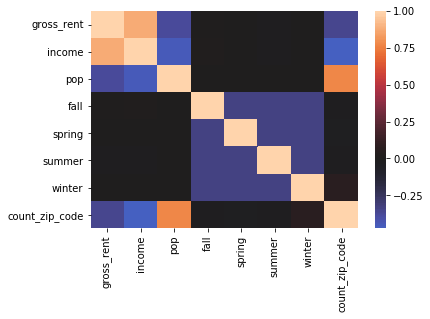

In [53]:
sns.heatmap(data_pred.corr(), center = 0)

In [58]:
data_ols = data_pred.copy()

In [59]:
data_ols.head()

,gross_rent,income,pop,fall,spring,summer,winter,count_zip_code
0,645,24610,12468,0,0,0,1,3
1,705,21553,38938,0,0,0,1,15
2,744,31371,43444,0,0,0,1,17
3,758,26893,34187,0,0,0,1,25
4,851,23962,42779,0,0,0,1,25


In [60]:
formula = 'count_zip_code ~ gross_rent+income+pop'
model = ols(formula= formula, data=data_ols).fit()

In [61]:
outcome = 'count_zip_code'
predictors = data_ols.drop('count_zip_code', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [62]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 05 Dec 2018   Prob (F-statistic):          1.54e-144
Time:                        20:12:38   Log-Likelihood:                -2673.7
No. Observations:                 696   AIC:                             5361.
Df Residuals:                     689   BIC:                             5393.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9022      1.572      2.482      0.013       0.815       6.990
gross_rent     0.0073      0.002      3.850      0.000       0.004       0.011
income        -0.0002   2.96e-05     -6.495      0.000      -0.000      -0.000
pop            0.0005   1.83e-05     26.684      0.000       0.000       0.001
fall           0.5761      0.843      0.683      0.495      -1.079       2.231
spring         0.0009      0.843      0.001      0.999      -1.654       1.656
summer         0.0750      0.840      0.089      0.929      -1.573       1.723
winter         3.2502      0.840      3.867      0.000       1.600       4.900
==============================================================================
Omnibus:                      126.244   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.840
Skew:                           0.995   Prob(JB):                     5.67e-60
Kurtosis:                       5.334   Cond. No.                     1.39e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""